# xgboost
```python 
from xgboost import XGBClassifier
``` 
xgboost因為容易overfitting  
所以有early stop的機制幫助我們提早結束training  

- eval_set:  [(X_test, y_test)]  
設定要拿來檢驗overfitting的eval_set
- eval_metric: 'auc'  
檢驗eval_set的方法
- early_stopping_rounds :=10  
如果檢驗eval_set連續10都沒有進步就停止  


- n_estimators: 100  
生成樹的數量  

- learning_rate:  (default=0.1)  
shrinks the contribution of each tree by learning_rate  

- max_depth: (default=3)
           決定樹的深度, 太大會overfitting  

- booster : ='gbtree'
也可以用別的

- gamma : =0  
使用L2 loss regularization, 設太小會overfitting
- reg_lambda : =1  
使用L1 loss regularization, 設太小會overfitting
- scale_pos_weight : =1
如果是imbalance data, 可以設大一點讓positive資料影響高一點  

Model可以看importance知道哪個feature最常被用來split:   
```python
model.feature_importances_
```

In [10]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
dataset = loadtxt("data.txt", delimiter=",")
# split data into X (features) and y (label)
X = dataset[:, 0:8]
y = dataset[:, 8]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7, test_size = 0.33)
print(X_train.shape)
print(X_test.shape)
# we have two labels, 0 with no diabetes, 1 with disbetes
y[:5]

(514, 8)
(254, 8)


array([1., 0., 1., 0., 1.])

In [11]:
from xgboost import XGBClassifier
# eval_metrics can selecy rmse, logloss, error, auc, merror, mlogloss or custom define
eval_set =  [(X_test, y_test)]
model = XGBClassifier()
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc",
          eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.817834
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.816861
[2]	validation_0-auc:0.817297
[3]	validation_0-auc:0.824913
[4]	validation_0-auc:0.823034
[5]	validation_0-auc:0.824946
[6]	validation_0-auc:0.822632
[7]	validation_0-auc:0.827026
[8]	validation_0-auc:0.824242
[9]	validation_0-auc:0.825114
[10]	validation_0-auc:0.823705
[11]	validation_0-auc:0.826557
[12]	validation_0-auc:0.826087
[13]	validation_0-auc:0.828637
[14]	validation_0-auc:0.826188
[15]	validation_0-auc:0.827261
[16]	validation_0-auc:0.824678
[17]	validation_0-auc:0.825349
[18]	validation_0-auc:0.827798
[19]	validation_0-auc:0.830213
[20]	validation_0-auc:0.829509
[21]	validation_0-auc:0.827865
[22]	validation_0-auc:0.828335
[23]	validation_0-auc:0.828771
[24]	validation_0-auc:0.828435
[25]	validation_0-auc:0.829006
[26]	validation_0-auc:0.828435
[27]	validation_0-auc:0.829173
[28]	validation_0-auc:0.828704
[29]	validation_0-auc:0.829039
Stopping. Best i

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [12]:
# model.predict_proba will return the probility
# model.predict will return the predict label (use 0.5 as threshold)
y_pred = model.predict_proba(X_test)
y_pred[:5]

array([[0.8861989 , 0.11380111],
       [0.1685105 , 0.8314895 ],
       [0.43833125, 0.56166875],
       [0.8861989 , 0.11380111],
       [0.54149556, 0.4585044 ]], dtype=float32)

In [13]:
# we use model.predict to get the label
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.77%


[0.07617985 0.32839927 0.03868151 0.0612992  0.11615451 0.17635493
 0.09744125 0.10548946]


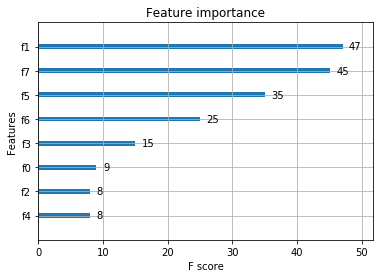

In [15]:
print(model.feature_importances_)
from xgboost import plot_importance
plot_importance(model)
plt.show()

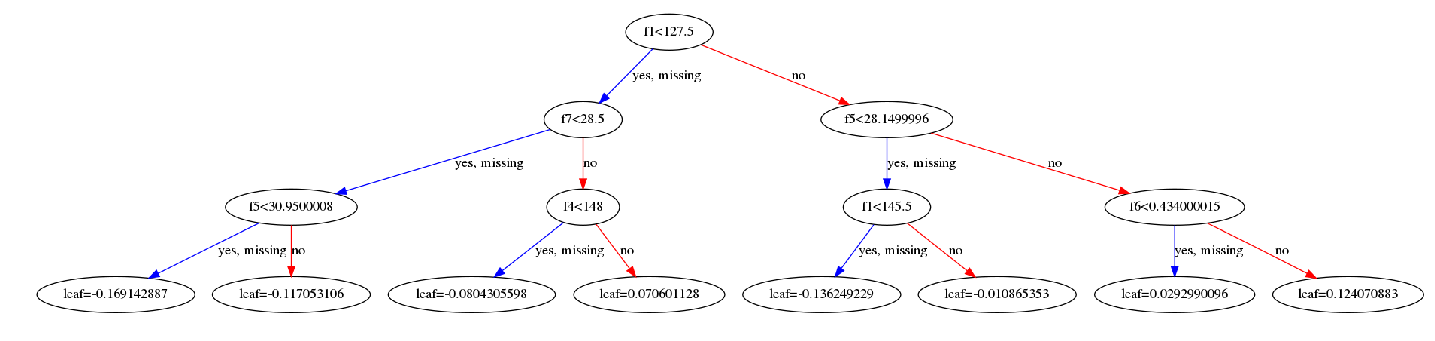

In [35]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25,25
plot_tree(model, num_trees=1)
# plt.title("max_depth = 100, with gamma = 10")
# plt.savefig("tree_with_max_depth_gamma", dpi = 700)
plt.show()

## Reference for XGBoost

[Well explained for Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)

[Analytic vidhya parameter tuning](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
[How parralle xgboost work](http://zhanpengfang.github.io/418home.html)

[How to tune gamma](https://medium.com/data-design/xgboost-hi-im-gamma-what-can-i-do-for-you-and-the-tuning-of-regularization-a42ea17e6ab6)

[slides for xgboost by tqchen](http://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf)

[slides for xgboost by kaggle winner](https://www.slideshare.net/ShangxuanZhang/kaggle-winning-solution-xgboost-algorithm-let-us-learn-from-its-author)

[xgboost 理論與參數介紹](http://odjt9j2ec.bkt.clouddn.com/xgboost-xgboost%E5%AF%BC%E8%AF%BB%E5%92%8C%E5%AE%9E%E6%88%98.pdf)